In [1]:
import json


path = "../data/preprocessed/glaive_function.json"
with open(path, "r") as f:
    data = json.load(f)

## Glaive dataset

Пример без function calling

In [2]:
data[0]

[{'role': 'system',
  'content': 'You are a helpful assistant with access to the following functions. Use them if required -\n{\n"name": "get_exchange_rate",\n"description": "Get the exchange rate between two currencies",\n"parameters": {\n"type": "object",\n"properties": {\n"base_currency": {\n"type": "string",\n"description": "The currency to convert from"\n},\n"target_currency": {\n"type": "string",\n"description": "The currency to convert to"\n}\n},\n"required": [\n"base_currency",\n"target_currency"\n]\n}\n}'},
 {'role': 'user',
  'content': 'Can you book a flight for me from New York to London?'},
 {'role': 'assistant',
  'content': "I'm sorry, but I don't have the capability to book flights. My current function allows me to get the exchange rate between two currencies. If you need help with that, feel free to ask!"}]

Пример с function calling

In [3]:
data[2]

[{'role': 'system',
  'content': 'You are a helpful assistant with access to the following functions. Use them if required -\n{\n"name": "generate_password",\n"description": "Generate a random password",\n"parameters": {\n"type": "object",\n"properties": {\n"length": {\n"type": "integer",\n"description": "The length of the password"\n},\n"include_symbols": {\n"type": "boolean",\n"description": "Whether to include symbols in the password"\n}\n},\n"required": [\n"length"\n]\n}\n}\n\n{\n"name": "create_task",\n"description": "Create a new task in a task management system",\n"parameters": {\n"type": "object",\n"properties": {\n"title": {\n"type": "string",\n"description": "The title of the task"\n},\n"due_date": {\n"type": "string",\n"format": "date",\n"description": "The due date of the task"\n},\n"priority": {\n"type": "string",\n"enum": [\n"low",\n"medium",\n"high"\n],\n"description": "The priority of the task"\n}\n},\n"required": [\n"title",\n"due_date",\n"priority"\n]\n}\n}'},
 {'role

Всего примеров с и без function calling

In [4]:
def contains_fc(msg):
    for m in msg:
        if m["role"] == "function":
            return True
    return False


print("Всего примеров: ", len(data))

with_fc_num = len([x for x in data if contains_fc(x)])
print("С Function Calling: ", with_fc_num)
print("Без Function Calling: ", len(data) - with_fc_num)

Всего примеров:  112790
С Function Calling:  63212
Без Function Calling:  49578


Распределение кол-ва сообщений от User-a к модели

Среднее кол-во запросов от юзера в чате: 2.3606614061530276


(array([2.9689e+04, 4.6581e+04, 1.8865e+04, 4.3500e+03, 1.0758e+04,
        2.2630e+03, 2.4800e+02, 2.4000e+01, 6.0000e+00, 6.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

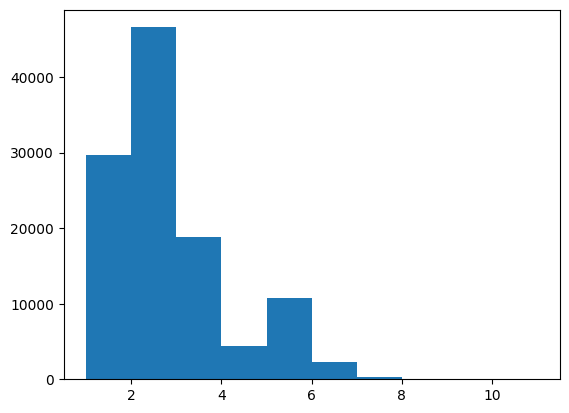

In [5]:
import matplotlib.pyplot as plt

user_msg = []
for message_list in data:
    c = 0
    for msg in message_list:
        if msg["role"] == "user":
            c += 1
    user_msg.append(c)

print("Среднее кол-во запросов от юзера в чате:", sum(user_msg) / len(user_msg))
plt.hist(user_msg)

## My Sample of Glaive Dataset

In [6]:
path = "../data/preprocessed/glaive_function_sampled.json"

with open(path, "r") as f:
    data = json.load(f)

In [7]:
data[0]

[{'role': 'system',
  'content': 'You are a helpful assistant, with no access to external functions.'},
 {'role': 'user',
  'content': 'Can you create a new magical creature struct in Go with the following attributes: name (string), element (string), abilities (slice of strings), and description (string)? Additionally, can you implement a function that randomly generates a new instance of this magical creature with unique abilities and a detailed description using the fmt package?'},
 {'role': 'assistant',
  'content': 'Sure, here\'s an example of how you can create a new `MagicalCreature` struct in Go with the attributes you described:\n```go\npackage main\nimport (\n"fmt"\n"math/rand"\n"time"\n)\ntype MagicalCreature struct {\nName string\nElement string\nAbilities []string\nDescription string\n}\nfunc main() {\nrand.Seed(time.Now().UnixNano())\n// Example usage\ncreature := GenerateRandomCreature()\nfmt.Printf("%s is a magical creature that controls %s. Its abilities include %v. %sn

In [8]:
def contains_fc(msg):
    for m in msg:
        if m["role"] == "function":
            return True
    return False


print("Всего примеров: ", len(data))

with_fc_num = len([x for x in data if contains_fc(x)])
print("С Function Calling: ", with_fc_num)
print("Без Function Calling: ", len(data) - with_fc_num)

Всего примеров:  1000
С Function Calling:  700
Без Function Calling:  300


Среднее кол-во запросов от юзера в чате: 2.292


(array([237., 460.,   0., 191.,   0.,  17.,  77.,   0.,  17.,   1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

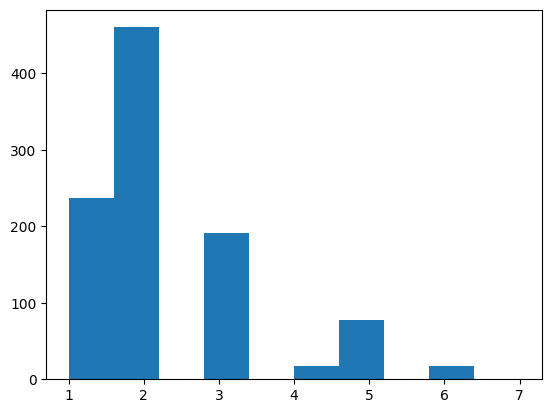

In [9]:
import matplotlib.pyplot as plt

user_msg = []
for message_list in data:
    c = 0
    for msg in message_list:
        if msg["role"] == "user":
            c += 1
    user_msg.append(c)

print("Среднее кол-во запросов от юзера в чате:", sum(user_msg) / len(user_msg))
plt.hist(user_msg)

## My Dataset

In [10]:
import pandas as pd

results_df = pd.read_csv("../data/test/final/result_df.csv")

In [11]:
results_df["is_fc"].value_counts(dropna=False)

is_fc
True     118
False    113
Name: count, dtype: int64

In [12]:
results_df[results_df["is_fc"] == True]["city_from"].value_counts(dropna=False)

city_from
Moscow           50
Yekaterinburg    46
Novosibirsk      22
Name: count, dtype: int64

In [13]:
results_df[results_df["is_fc"] == True]["city_to"].value_counts(dropna=False)

city_to
Saint-Petersburg    58
Novosibirsk         22
NaN                 20
Moscow              18
Name: count, dtype: int64

In [14]:
results_df[results_df["is_fc"] == True]["date"].value_counts(dropna=False)

date
NaN           22
09.20.2022    20
11.17.2022    20
04.12.2020    20
11.28.2021    18
09.15.2021    18
Name: count, dtype: int64

In [15]:
results_df[results_df["is_fc"] == True]["date_back"].value_counts(dropna=False)

date_back
NaN           80
12.15.2022     8
01.23.2023     8
03.01.2023     8
03.06.2021     8
11.05.2022     6
Name: count, dtype: int64

In [16]:
results_df[results_df["is_fc"] == True]["need_luggage"].value_counts(dropna=False)

need_luggage
NaN      80
False    20
True     18
Name: count, dtype: int64